# Doctor Who - Actor Timeline

## Topics Covered

* Extracting text data from a Wikipedia table
* Pandas `.read_html()`
* Regular Expressions
* Getting time series data out of text data
* Timeline visualization

In this example, we will be creating a barplot that shows which actors played The Doctor on Doctor Who at which times. There is a Wikipedia article that shows this in a table, but we'd like to visualize the data.

https://en.wikipedia.org/wiki/List_of_actors_who_have_played_the_Doctor

## Imports

In [1]:
import re
import datetime
import requests

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### `requests`

We will be using the `requests` module to perform a "get" HTML request to the aforementioned Wikipedia page.

For a more extensive tutorial on the `requests` module and on web-scraping, please see the archived "Practical Python" workshop materials on the Library's "[Introduction to Python](https://libguides.libraries.claremont.edu/intro-to-python)" Research Guide.

Once we get the page's data, we will use pandas to convert the table in question to a DataFrame, and then use regular expressions to clean the data and make it usable.

In [2]:
#This next line may be commented out after running to avoid sending
#a request more than necessary; requests typically have a rate limit
r = requests.get('https://en.wikipedia.org/wiki/List_of_actors_who_have_played_the_Doctor')
page_data = r.content

### pandas read_html (The Easy Way)

In [3]:
wiki_data = pd.read_html(page_data)

In [4]:
wiki_data

[                            Actor (role)  \
 0        William Hartnell (First Doctor)   
 1        William Hartnell (First Doctor)   
 2      Patrick Troughton (Second Doctor)   
 3      Patrick Troughton (Second Doctor)   
 4             Jon Pertwee (Third Doctor)   
 5             Jon Pertwee (Third Doctor)   
 6              Tom Baker (Fourth Doctor)   
 7              Tom Baker (Fourth Doctor)   
 8           Peter Davison (Fifth Doctor)   
 9           Peter Davison (Fifth Doctor)   
 10            Colin Baker (Sixth Doctor)   
 11            Colin Baker (Sixth Doctor)   
 12      Sylvester McCoy (Seventh Doctor)   
 13      Sylvester McCoy (Seventh Doctor)   
 14           Paul McGann (Eighth Doctor)   
 15           Paul McGann (Eighth Doctor)   
 16  Christopher Eccleston (Ninth Doctor)   
 17  Christopher Eccleston (Ninth Doctor)   
 18          David Tennant (Tenth Doctor)   
 19          David Tennant (Tenth Doctor)   
 20          Matt Smith (Eleventh Doctor)   
 21       

Pandas's `.read_html()` method grabs *all* the tables it finds in html code. We have to locate the table we want, by looking at individual elements of the resulting list.

In [5]:
wiki_data[0]

,Actor (role),Tenure,First regular appearance,Last regular appearance
0,William Hartnell (First Doctor),"23 November 1963 – 29 October 1966 (2 years, 1...","An Unearthly Child ""An Unearthly Child""[1]",The Tenth Planet Episode 4[2]
1,William Hartnell (First Doctor),Other First Doctor appearances William Hartnel...,Other First Doctor appearances William Hartnel...,Other First Doctor appearances William Hartnel...
2,Patrick Troughton (Second Doctor),"29 October 1966 – 21 June 1969 (2 years, 7 mon...",The Power of the Daleks Episode One[5],The War Games Episode Ten[2]
3,Patrick Troughton (Second Doctor),Other Second Doctor appearances Television: Th...,Other Second Doctor appearances Television: Th...,Other Second Doctor appearances Television: Th...
4,Jon Pertwee (Third Doctor),"3 January 1970 – 8 June 1974 (4 years, 5 month...",Spearhead from Space Episode One,Planet of the Spiders Part Six[2]
5,Jon Pertwee (Third Doctor),Other Third Doctor appearances Stage: Glorious...,Other Third Doctor appearances Stage: Glorious...,Other Third Doctor appearances Stage: Glorious...
6,Tom Baker (Fourth Doctor),"8 June 1974 – 21 March 1981 (6 years, 9 months...",Robot Part One[7],Logopolis Part Four[2]
7,Tom Baker (Fourth Doctor),"Tom Baker also appeared as the Curator in ""The...","Tom Baker also appeared as the Curator in ""The...","Tom Baker also appeared as the Curator in ""The..."
8,Peter Davison (Fifth Doctor),"21 March 1981 – 16 March 1984 (2 years, 11 mon...",Castrovalva Part One,The Caves of Androzani Part Four[2]
9,Peter Davison (Fifth Doctor),Other Fifth Doctor appearances Television: Blu...,Other Fifth Doctor appearances Television: Blu...,Other Fifth Doctor appearances Television: Blu...


Luckily, the table we need is the first one in the list.

In the "Tenure" column of the table (which is now our , all Doctors' dates are listed as a one-or-two-digit number, the full name of the month, then the four-digit year. We can use regular expressions to extract their starting and ending years.

### Regular Expressions

What are regular expressions?

[Regular expressions](https://en.wikipedia.org/wiki/Regular_expression), or regex for short, are sequences of characters that can be used to find segments of text that match specified conditions. They are used in search engines and in-page/in-document searches.

Regex patterns are not a programming language, but their application is fairly universal, so the string of characters used for a regex pattern in Python, Java, JavaScript, C++, or R will all be the same.

There are many free resources for learning regex patterns; you will not need to memorize them in order to use them, but you will need to understand how they are assembled.

Both regexr and regex101 offer live platforms to test out patterns on sample text; this can be a very effective means of testing regex patterns. If you really want to test your understanding of regex syntax, you can do so with regex crosswords.

[regexr](https://regexr.com/)

[regex101](https://regex101.com/)

[Regex Crossword](https://regexcrossword.com/)

In [6]:
doctors = list(wiki_data[0]['Actor (role)'][::2])

In [7]:
doctors

['William Hartnell (First Doctor)',
 'Patrick Troughton (Second Doctor)',
 'Jon Pertwee (Third Doctor)',
 'Tom Baker (Fourth Doctor)',
 'Peter Davison (Fifth Doctor)',
 'Colin Baker (Sixth Doctor)',
 'Sylvester McCoy (Seventh Doctor)',
 'Paul McGann (Eighth Doctor)',
 'Christopher Eccleston (Ninth Doctor)',
 'David Tennant (Tenth Doctor)',
 'Matt Smith (Eleventh Doctor)',
 'Peter Capaldi (Twelfth Doctor)',
 'Jodie Whittaker (Thirteenth Doctor)',
 'David Tennant (Fourteenth Doctor)',
 'Ncuti Gatwa (Fifteenth Doctor)']

In [8]:
doctor_numbers = [doctor.split(' (')[1].replace(')','') for doctor in doctors]
doctor_numbers

['First Doctor',
 'Second Doctor',
 'Third Doctor',
 'Fourth Doctor',
 'Fifth Doctor',
 'Sixth Doctor',
 'Seventh Doctor',
 'Eighth Doctor',
 'Ninth Doctor',
 'Tenth Doctor',
 'Eleventh Doctor',
 'Twelfth Doctor',
 'Thirteenth Doctor',
 'Fourteenth Doctor',
 'Fifteenth Doctor']

In [9]:
doctors = [doctor.split(' (')[0] for doctor in doctors]
doctors

['William Hartnell',
 'Patrick Troughton',
 'Jon Pertwee',
 'Tom Baker',
 'Peter Davison',
 'Colin Baker',
 'Sylvester McCoy',
 'Paul McGann',
 'Christopher Eccleston',
 'David Tennant',
 'Matt Smith',
 'Peter Capaldi',
 'Jodie Whittaker',
 'David Tennant',
 'Ncuti Gatwa']

In [10]:
tenure = list(wiki_data[0]['Tenure'][::2])

In [11]:
# Create emtpy lists to store actors' start and end dates as Doctor

start_years = []
end_years = []

# Iterate through table, pulling first and optionally second years from each Tenure cell:
for entry in tenure:
    years = re.findall(r'\d\d\d\d', entry)
    present = re.findall(r'present', entry)
    start_years.append(years[0])
    
    if len(years) < 2:
        # If the Doctor is the current Doctor, append current year:
        if present:
            end_years.append(datetime.date.today().year)
        # If there is no second year but the Doctor is not
        # the current Doctor, append first year to both lists
        else:
            end_years.append(years[0])
    else:
        end_years.append(years[1])

In [12]:
# Create emtpy lists to store actors' start and end dates as Doctor

start_dates = []
end_dates = []

# Iterate through table, pulling first and optionally second years from each Tenure cell:
for entry in tenure:
    years = re.findall(r'\d+\s+\D+\s+\d{4}', entry)
    present = re.findall(r'present', entry)
    start_dates.append(years[0])
    
    if len(years) < 2:
        # If the Doctor is the current Doctor, append current year:
        if present:
            end_dates.append(datetime.date.today().strftime('%d %B %Y'))
        # If there is no second year but the Doctor is not
        # the current Doctor, append first year to both lists
        else:
            end_dates.append(years[0])
    else:
        end_dates.append(years[1])

https://strftime.org/

In [13]:
doctor_tenures = pd.DataFrame()

doctor_tenures['Doctor'] = doctors
doctor_tenures['Doctor Number'] = doctor_numbers
doctor_tenures['Start Date'] = start_dates
doctor_tenures['End Date'] = end_dates

doctor_tenures

,Doctor,Doctor Number,Start Date,End Date
0,William Hartnell,First Doctor,23 November 1963,29 October 1966
1,Patrick Troughton,Second Doctor,29 October 1966,21 June 1969
2,Jon Pertwee,Third Doctor,3 January 1970,8 June 1974
3,Tom Baker,Fourth Doctor,8 June 1974,21 March 1981
4,Peter Davison,Fifth Doctor,21 March 1981,16 March 1984
5,Colin Baker,Sixth Doctor,16 March 1984,6 December 1986
6,Sylvester McCoy,Seventh Doctor,7 September 1987,6 December 1989
7,Paul McGann,Eighth Doctor,27 May 1996,27 May 1996
8,Christopher Eccleston,Ninth Doctor,26 March 2005,18 June 2005
9,David Tennant,Tenth Doctor,18 June 2005,1 January 2010


## Date and Time

What do you suppose the most useful date format is from a programming perspective?

#### (Click to reveal)

YYYYMMDD has the advantage of being chronologically sortable as a simple integer value.

In [14]:
#MMDDYYYY
12132024 < 12112025

False

In [15]:
#YYYYMMDD
20241213 < 20251211

True

## Dateutil

Python's builtin `datetime` module is powerful, but leaves something to be desired in ease of use. The `dateutil` module is an extension to `datetime` that makes parsing and formatting dates easier. 

In [16]:
from dateutil import parser

The dateutil parser can interpret dates in a number of different formats. It defaults to the US convention of MM-DD-YYYY formatting, but it can be set to parse [different date formats](https://en.wikipedia.org/wiki/List_of_date_formats_by_country). 

It can also interpret months written as words and ordinal dates written as "1st", "2nd", "3rd", etc., though it cannot parse ordinal dates written as words (e.g. "June third, 2002")

In [17]:
parser.parse('9 December 1986')

datetime.datetime(1986, 12, 9, 0, 0)

In [18]:
parser.parse('December 9 1986')

datetime.datetime(1986, 12, 9, 0, 0)

In [19]:
parser.parse('12 9 1986')

datetime.datetime(1986, 12, 9, 0, 0)

In [20]:
parser.parse('9/12/1986')

datetime.datetime(1986, 9, 12, 0, 0)

In [21]:
parser.parse('9/12/1986', dayfirst=True)

datetime.datetime(1986, 12, 9, 0, 0)

In [22]:
parser.parse('June 3rd, 2002')

datetime.datetime(2002, 6, 3, 0, 0)

In [23]:
parser.parse('3rd June, 2002')

datetime.datetime(2002, 6, 3, 0, 0)

### Coding Exercise - `dateutil` Parser
Try passing a date into the dateutil parser. See for yourself which formats work and which do not.



In [ ]:
################################################################################
################################################################################

parser.parse('')

################################################################################
################################################################################

In [25]:
doctor_tenures['Start Date'] = doctor_tenures['Start Date'].apply(lambda x: parser.parse(x))
doctor_tenures['End Date'] = doctor_tenures['End Date'].apply(lambda x: parser.parse(x))

In [26]:
doctor_tenures

,Doctor,Doctor Number,Start Date,End Date
0,William Hartnell,First Doctor,1963-11-23,1966-10-29
1,Patrick Troughton,Second Doctor,1966-10-29,1969-06-21
2,Jon Pertwee,Third Doctor,1970-01-03,1974-06-08
3,Tom Baker,Fourth Doctor,1974-06-08,1981-03-21
4,Peter Davison,Fifth Doctor,1981-03-21,1984-03-16
5,Colin Baker,Sixth Doctor,1984-03-16,1986-12-06
6,Sylvester McCoy,Seventh Doctor,1987-09-07,1989-12-06
7,Paul McGann,Eighth Doctor,1996-05-27,1996-05-27
8,Christopher Eccleston,Ninth Doctor,2005-03-26,2005-06-18
9,David Tennant,Tenth Doctor,2005-06-18,2010-01-01


In [27]:
for x in doctor_tenures['Start Date']:
    print(x, type(x))

1963-11-23 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
1966-10-29 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
1970-01-03 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
1974-06-08 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
1981-03-21 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
1984-03-16 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
1987-09-07 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
1996-05-27 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
2005-03-26 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
2005-06-18 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
2010-01-01 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
2013-12-25 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
2017-12-25 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
2022-10-23 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
2023-1

In [28]:
for x in doctor_tenures['End Date']:
    print(x, type(x))

1966-10-29 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
1969-06-21 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
1974-06-08 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
1981-03-21 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
1984-03-16 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
1986-12-06 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
1989-12-06 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
1996-05-27 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
2005-06-18 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
2010-01-01 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
2013-12-25 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
2017-12-25 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
2022-10-23 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
2023-12-09 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
2025-0

In [29]:
doctor_tenures

,Doctor,Doctor Number,Start Date,End Date
0,William Hartnell,First Doctor,1963-11-23,1966-10-29
1,Patrick Troughton,Second Doctor,1966-10-29,1969-06-21
2,Jon Pertwee,Third Doctor,1970-01-03,1974-06-08
3,Tom Baker,Fourth Doctor,1974-06-08,1981-03-21
4,Peter Davison,Fifth Doctor,1981-03-21,1984-03-16
5,Colin Baker,Sixth Doctor,1984-03-16,1986-12-06
6,Sylvester McCoy,Seventh Doctor,1987-09-07,1989-12-06
7,Paul McGann,Eighth Doctor,1996-05-27,1996-05-27
8,Christopher Eccleston,Ninth Doctor,2005-03-26,2005-06-18
9,David Tennant,Tenth Doctor,2005-06-18,2010-01-01


In [30]:
doctor_tenures['StartEnd'] = [(start, end) for start, end in zip(doctor_tenures['Start Date'], doctor_tenures['End Date'])]
doctor_tenures['StartEnd'] = [[entry] for entry in doctor_tenures['StartEnd']]

In [31]:
doctor_tenures

,Doctor,Doctor Number,Start Date,End Date,StartEnd
0,William Hartnell,First Doctor,1963-11-23,1966-10-29,"[(1963-11-23 00:00:00, 1966-10-29 00:00:00)]"
1,Patrick Troughton,Second Doctor,1966-10-29,1969-06-21,"[(1966-10-29 00:00:00, 1969-06-21 00:00:00)]"
2,Jon Pertwee,Third Doctor,1970-01-03,1974-06-08,"[(1970-01-03 00:00:00, 1974-06-08 00:00:00)]"
3,Tom Baker,Fourth Doctor,1974-06-08,1981-03-21,"[(1974-06-08 00:00:00, 1981-03-21 00:00:00)]"
4,Peter Davison,Fifth Doctor,1981-03-21,1984-03-16,"[(1981-03-21 00:00:00, 1984-03-16 00:00:00)]"
5,Colin Baker,Sixth Doctor,1984-03-16,1986-12-06,"[(1984-03-16 00:00:00, 1986-12-06 00:00:00)]"
6,Sylvester McCoy,Seventh Doctor,1987-09-07,1989-12-06,"[(1987-09-07 00:00:00, 1989-12-06 00:00:00)]"
7,Paul McGann,Eighth Doctor,1996-05-27,1996-05-27,"[(1996-05-27 00:00:00, 1996-05-27 00:00:00)]"
8,Christopher Eccleston,Ninth Doctor,2005-03-26,2005-06-18,"[(2005-03-26 00:00:00, 2005-06-18 00:00:00)]"
9,David Tennant,Tenth Doctor,2005-06-18,2010-01-01,"[(2005-06-18 00:00:00, 2010-01-01 00:00:00)]"


In [32]:
start_date_timeline = {key: value for key, value in zip(doctor_tenures['Doctor'], doctor_tenures['Start Date'])}
start_date_timeline = {}

for key, value in zip(doctor_tenures['Doctor'], doctor_tenures['Start Date']):
    if key not in start_date_timeline.keys():
        start_date_timeline[key] = value



In [33]:
start_date_timeline

{'William Hartnell': Timestamp('1963-11-23 00:00:00'),
 'Patrick Troughton': Timestamp('1966-10-29 00:00:00'),
 'Jon Pertwee': Timestamp('1970-01-03 00:00:00'),
 'Tom Baker': Timestamp('1974-06-08 00:00:00'),
 'Peter Davison': Timestamp('1981-03-21 00:00:00'),
 'Colin Baker': Timestamp('1984-03-16 00:00:00'),
 'Sylvester McCoy': Timestamp('1987-09-07 00:00:00'),
 'Paul McGann': Timestamp('1996-05-27 00:00:00'),
 'Christopher Eccleston': Timestamp('2005-03-26 00:00:00'),
 'David Tennant': Timestamp('2005-06-18 00:00:00'),
 'Matt Smith': Timestamp('2010-01-01 00:00:00'),
 'Peter Capaldi': Timestamp('2013-12-25 00:00:00'),
 'Jodie Whittaker': Timestamp('2017-12-25 00:00:00'),
 'Ncuti Gatwa': Timestamp('2023-12-09 00:00:00')}

In [34]:
doctor_tenures

,Doctor,Doctor Number,Start Date,End Date,StartEnd
0,William Hartnell,First Doctor,1963-11-23,1966-10-29,"[(1963-11-23 00:00:00, 1966-10-29 00:00:00)]"
1,Patrick Troughton,Second Doctor,1966-10-29,1969-06-21,"[(1966-10-29 00:00:00, 1969-06-21 00:00:00)]"
2,Jon Pertwee,Third Doctor,1970-01-03,1974-06-08,"[(1970-01-03 00:00:00, 1974-06-08 00:00:00)]"
3,Tom Baker,Fourth Doctor,1974-06-08,1981-03-21,"[(1974-06-08 00:00:00, 1981-03-21 00:00:00)]"
4,Peter Davison,Fifth Doctor,1981-03-21,1984-03-16,"[(1981-03-21 00:00:00, 1984-03-16 00:00:00)]"
5,Colin Baker,Sixth Doctor,1984-03-16,1986-12-06,"[(1984-03-16 00:00:00, 1986-12-06 00:00:00)]"
6,Sylvester McCoy,Seventh Doctor,1987-09-07,1989-12-06,"[(1987-09-07 00:00:00, 1989-12-06 00:00:00)]"
7,Paul McGann,Eighth Doctor,1996-05-27,1996-05-27,"[(1996-05-27 00:00:00, 1996-05-27 00:00:00)]"
8,Christopher Eccleston,Ninth Doctor,2005-03-26,2005-06-18,"[(2005-03-26 00:00:00, 2005-06-18 00:00:00)]"
9,David Tennant,Tenth Doctor,2005-06-18,2010-01-01,"[(2005-06-18 00:00:00, 2010-01-01 00:00:00)]"


In [35]:
doctor_tenures['timediff'] = doctor_tenures['StartEnd'].apply(lambda x: [y[1] - y[0] for y in x])

In [36]:
doc_tenures_graph = doctor_tenures.groupby('Doctor', as_index=False)[['StartEnd', 'timediff']].sum().sort_values(by=['Doctor'], key=lambda x: x.map(start_date_timeline))
doc_tenures_graph.reset_index(inplace=True, drop=True)
doc_tenures_graph

,Doctor,StartEnd,timediff
0,William Hartnell,"[(1963-11-23 00:00:00, 1966-10-29 00:00:00)]",[1071 days 00:00:00]
1,Patrick Troughton,"[(1966-10-29 00:00:00, 1969-06-21 00:00:00)]",[966 days 00:00:00]
2,Jon Pertwee,"[(1970-01-03 00:00:00, 1974-06-08 00:00:00)]",[1617 days 00:00:00]
3,Tom Baker,"[(1974-06-08 00:00:00, 1981-03-21 00:00:00)]",[2478 days 00:00:00]
4,Peter Davison,"[(1981-03-21 00:00:00, 1984-03-16 00:00:00)]",[1091 days 00:00:00]
5,Colin Baker,"[(1984-03-16 00:00:00, 1986-12-06 00:00:00)]",[995 days 00:00:00]
6,Sylvester McCoy,"[(1987-09-07 00:00:00, 1989-12-06 00:00:00)]",[821 days 00:00:00]
7,Paul McGann,"[(1996-05-27 00:00:00, 1996-05-27 00:00:00)]",[0 days 00:00:00]
8,Christopher Eccleston,"[(2005-03-26 00:00:00, 2005-06-18 00:00:00)]",[84 days 00:00:00]
9,David Tennant,"[(2005-06-18 00:00:00, 2010-01-01 00:00:00), (...","[1658 days 00:00:00, 412 days 00:00:00]"


In [37]:
doctor_tenures

,Doctor,Doctor Number,Start Date,End Date,StartEnd,timediff
0,William Hartnell,First Doctor,1963-11-23,1966-10-29,"[(1963-11-23 00:00:00, 1966-10-29 00:00:00)]",[1071 days 00:00:00]
1,Patrick Troughton,Second Doctor,1966-10-29,1969-06-21,"[(1966-10-29 00:00:00, 1969-06-21 00:00:00)]",[966 days 00:00:00]
2,Jon Pertwee,Third Doctor,1970-01-03,1974-06-08,"[(1970-01-03 00:00:00, 1974-06-08 00:00:00)]",[1617 days 00:00:00]
3,Tom Baker,Fourth Doctor,1974-06-08,1981-03-21,"[(1974-06-08 00:00:00, 1981-03-21 00:00:00)]",[2478 days 00:00:00]
4,Peter Davison,Fifth Doctor,1981-03-21,1984-03-16,"[(1981-03-21 00:00:00, 1984-03-16 00:00:00)]",[1091 days 00:00:00]
5,Colin Baker,Sixth Doctor,1984-03-16,1986-12-06,"[(1984-03-16 00:00:00, 1986-12-06 00:00:00)]",[995 days 00:00:00]
6,Sylvester McCoy,Seventh Doctor,1987-09-07,1989-12-06,"[(1987-09-07 00:00:00, 1989-12-06 00:00:00)]",[821 days 00:00:00]
7,Paul McGann,Eighth Doctor,1996-05-27,1996-05-27,"[(1996-05-27 00:00:00, 1996-05-27 00:00:00)]",[0 days 00:00:00]
8,Christopher Eccleston,Ninth Doctor,2005-03-26,2005-06-18,"[(2005-03-26 00:00:00, 2005-06-18 00:00:00)]",[84 days 00:00:00]
9,David Tennant,Tenth Doctor,2005-06-18,2010-01-01,"[(2005-06-18 00:00:00, 2010-01-01 00:00:00)]",[1658 days 00:00:00]


# Visualization

[Example of Timeline Plot](https://deparkes.co.uk/2021/09/05/python-timeline-plot/) for period settings of television shows set in the UK. We can base our Gantt charts on this example, but we will need to alter some lines of code to better suit our purposes.

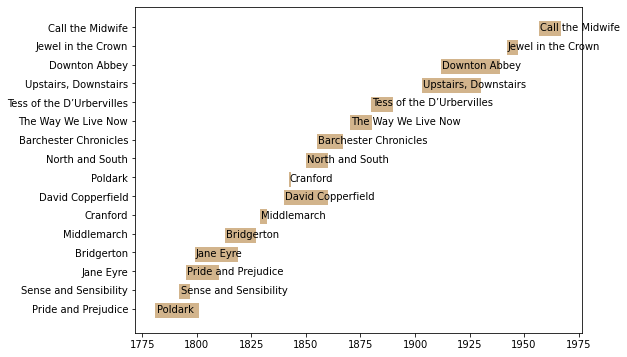

## Doctor Timeline

Both Paul McGann and Christopher Eccleston had tenures as Doctor less than a year. In order to show their timelines more accurately on the graph, we would need to use a python DateTime object instead of just the year. To compensate for now, we can pad the width of each bar. Here we use "\[(start_year-0.2, duration+0.4)]" to widen the bar enough that it is more visible.

### Graph 1

In [38]:
doctor_tenures.sort_values(by='Start Date')

,Doctor,Doctor Number,Start Date,End Date,StartEnd,timediff
0,William Hartnell,First Doctor,1963-11-23,1966-10-29,"[(1963-11-23 00:00:00, 1966-10-29 00:00:00)]",[1071 days 00:00:00]
1,Patrick Troughton,Second Doctor,1966-10-29,1969-06-21,"[(1966-10-29 00:00:00, 1969-06-21 00:00:00)]",[966 days 00:00:00]
2,Jon Pertwee,Third Doctor,1970-01-03,1974-06-08,"[(1970-01-03 00:00:00, 1974-06-08 00:00:00)]",[1617 days 00:00:00]
3,Tom Baker,Fourth Doctor,1974-06-08,1981-03-21,"[(1974-06-08 00:00:00, 1981-03-21 00:00:00)]",[2478 days 00:00:00]
4,Peter Davison,Fifth Doctor,1981-03-21,1984-03-16,"[(1981-03-21 00:00:00, 1984-03-16 00:00:00)]",[1091 days 00:00:00]
5,Colin Baker,Sixth Doctor,1984-03-16,1986-12-06,"[(1984-03-16 00:00:00, 1986-12-06 00:00:00)]",[995 days 00:00:00]
6,Sylvester McCoy,Seventh Doctor,1987-09-07,1989-12-06,"[(1987-09-07 00:00:00, 1989-12-06 00:00:00)]",[821 days 00:00:00]
7,Paul McGann,Eighth Doctor,1996-05-27,1996-05-27,"[(1996-05-27 00:00:00, 1996-05-27 00:00:00)]",[0 days 00:00:00]
8,Christopher Eccleston,Ninth Doctor,2005-03-26,2005-06-18,"[(2005-03-26 00:00:00, 2005-06-18 00:00:00)]",[84 days 00:00:00]
9,David Tennant,Tenth Doctor,2005-06-18,2010-01-01,"[(2005-06-18 00:00:00, 2010-01-01 00:00:00)]",[1658 days 00:00:00]


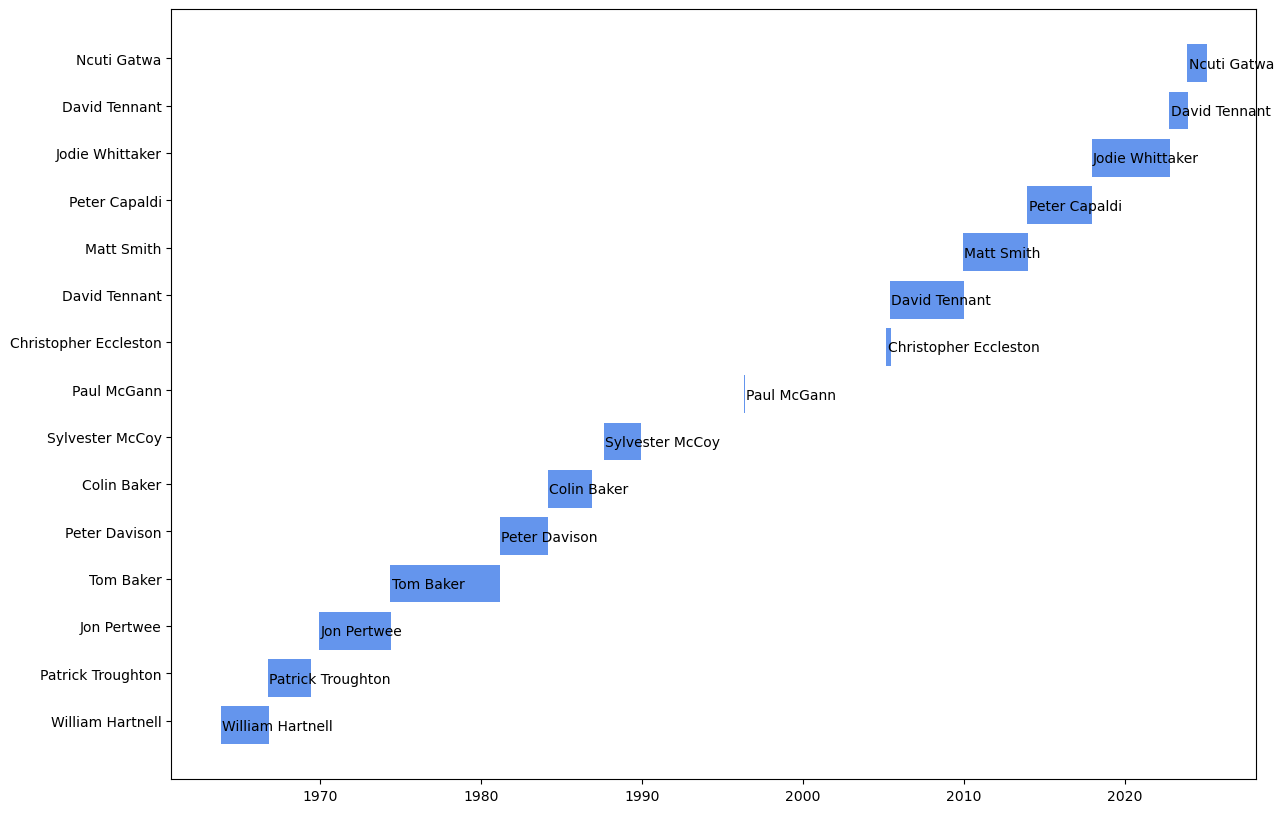

In [39]:
padding = datetime.timedelta(days=16)

fig, gnt = plt.subplots(figsize = (14, 10))
y_tick_labels = doctor_tenures.sort_values(by='Start Date')['Doctor']
y_pos = np.arange(len(y_tick_labels))

gnt.set_yticks(y_pos)
gnt.set_yticklabels(y_tick_labels)

for index, row in doctor_tenures.sort_values(by='Start Date').reset_index().iterrows():
    start_date = row['Start Date']
    duration = row['timediff'][0]
    
    gnt.broken_barh([(start_date-padding, duration+padding)], 
                    (index-0.5,0.8), 
                    facecolors =('cornflowerblue'),
                   label=row['Doctor'])
    gnt.text(start_date+padding, index-0.2, row['Doctor'])

### Graph 2

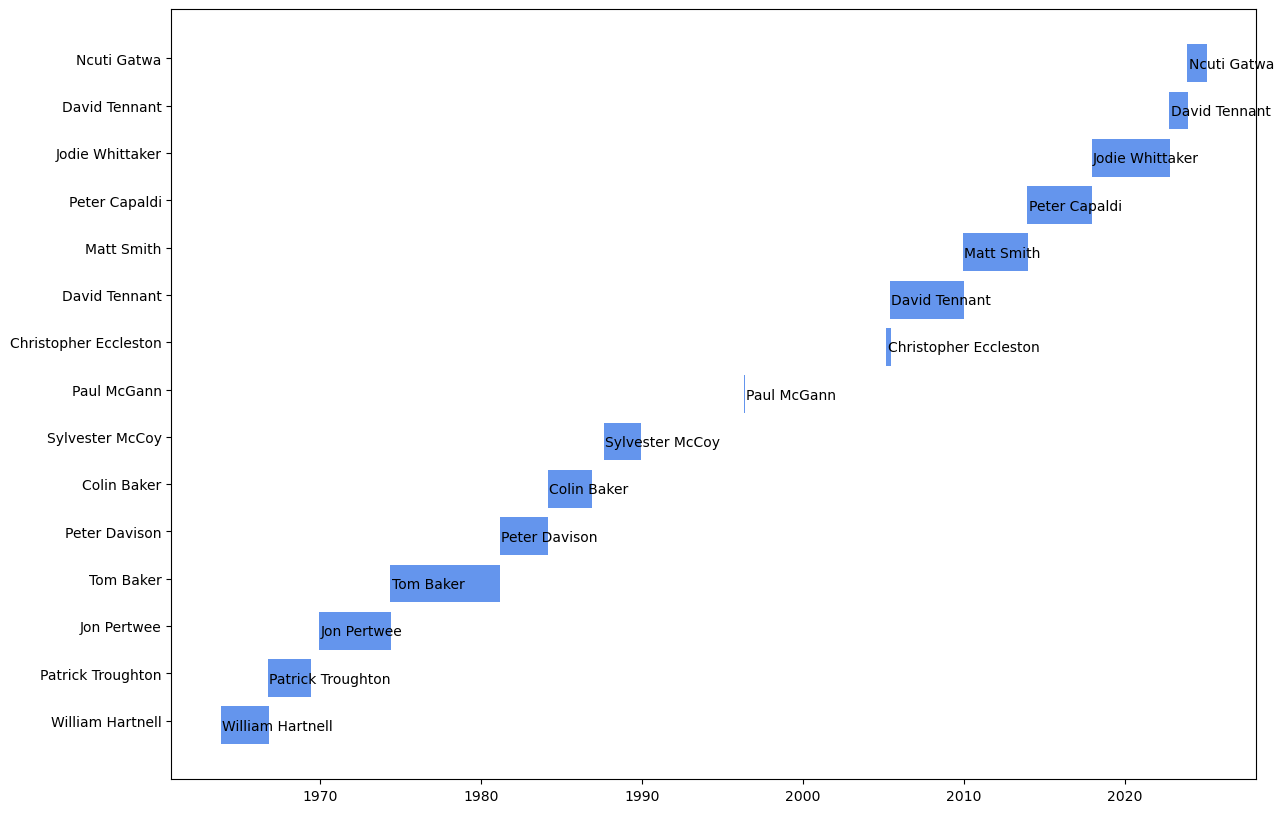

In [40]:
padding = datetime.timedelta(days=16)

fig, gnt = plt.subplots(figsize = (14, 10))
y_tick_labels = doctor_tenures.sort_values(by='Start Date')['Doctor']
y_pos = np.arange(len(y_tick_labels))

gnt.set_yticks(y_pos)
gnt.set_yticklabels(y_tick_labels)

for index, row in doctor_tenures.sort_values(by='Start Date').reset_index().iterrows():
    start_date = row['Start Date']
    duration = row['timediff'][0]

    gnt.broken_barh([(start_date-padding, duration+padding)], 
                    (index-0.5,0.8), 
                    facecolors =('cornflowerblue'),
                   label=row['Doctor'])
    gnt.text(start_date+padding, index-0.2, row['Doctor'])

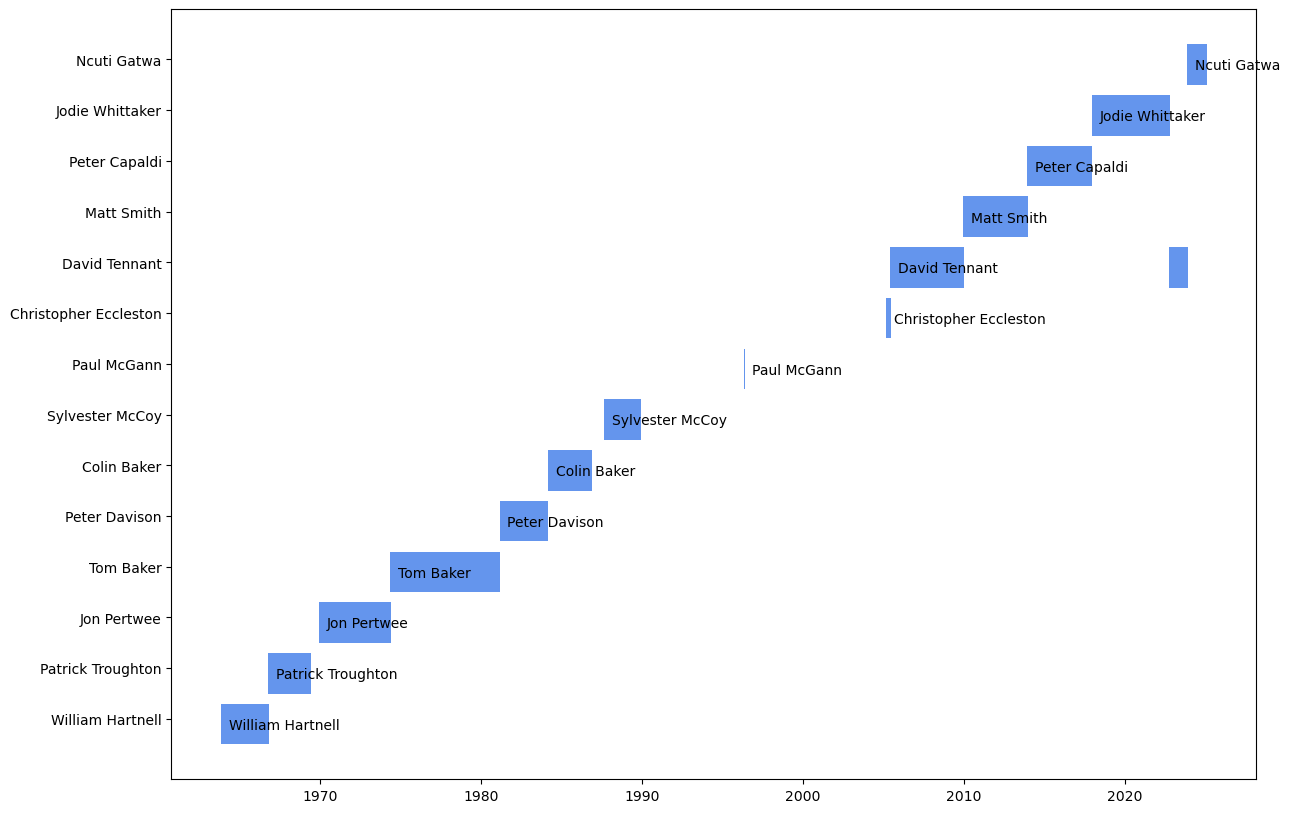

In [41]:
padding = datetime.timedelta(days=16)

fig, gnt = plt.subplots(figsize = (14, 10))
y_tick_labels = doc_tenures_graph['Doctor']
y_pos = np.arange(len(y_tick_labels))

gnt.set_yticks(y_pos)
gnt.set_yticklabels(y_tick_labels)

for index, row in doc_tenures_graph.iterrows():
    start_dates = [x[0] for x in row['StartEnd']]
    durations = [y for y in row['timediff']]

    gnt.broken_barh([(start_date-padding, duration+padding) for start_date, duration in zip(start_dates, durations)], 
                    (index-0.5,0.8), 
                    facecolors =('cornflowerblue'),
                   label=row['Doctor'])
    gnt.text(start_dates[0]+padding*10, index-0.2, row['Doctor'])